# <center>Employee Churn Prediction</center>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

&nbsp;
&nbsp;
&nbsp;
### Table of Contents

* [Part 1. Introduction](#part1)
    * [Section 1.1. Project outline](#section_1_1)
    * [Section 1.2. Codebook](#section_1_2)
* [Part 2. Exploratory data analysis](#part2)
    * [Section 2.1. Loading and inspecting the data](#section_2_1)
    * [Section 2.2. Exploring categorical variables](#section_2_2)
        * [2.2.1. Work accident](#section_2_2_1)
        * [2.2.2. Promotion in the last 5 years](#section_2_2_2)
        * [2.2.3. Department](#section_2_2_3)
        * [2.2.4. Salary](#section_2_2_4)
        * [2.2.5. Time spent in the company](#section_2_2_5)
        * [2.2.6. Number of projects](#section_2_2_6)
    * [Section 2.3. Exploring numerical variables](#section_2_3)
        * [2.3.1. Summary statistics for numerical variables](#section_2_3_1)
        * [2.3.2. Satisfaction level](#section_2_3_2)
        * [2.3.3. Last evaluation](#section_2_3_3)
        * [2.3.4. Average monthly hours](#section_2_3_4)
        * [2.3.5. Outliers](#section_2_3_5)
    * [Section 2.4. Data investigation](#section_2_4)
* [Part 3. Modelling](#part3)
    * [Section 3.1. Data Transformation](#section_3_1)
    * [Section 3.2. Correlation Analysis](#section_3_2)
    * [Section 3.3. Multicollinearity analysis](#section_3_3)
    * [Section 3.4. Model development and evaluation](#section_3_4)
        * [3.4.1. Linear Discriminant Analysis](#section_3_4_1)
        * [3.4.2. Logistic Regression](#section_3_4_2)
        * [3.4.3. Random Forest Classifier](#section_3_4_3)
* [Part 4. Conclusion](#part4)

&nbsp;
&nbsp;
&nbsp;
&nbsp;
# Part 1. Introduction <a class="anchor" id="part1"></a>

## Section 1.1. Project outline <a class="anchor" id="section_1_1"></a>

The purpose of this research is to create a model that will predict whether an employee is likely to stay with the company or leave it based on some of his or her characteristics (features). The features are given in the Codebook. 

As the response variable is a dichotomous categorical variable, three models will be used to predict the outcome: Linear Discriminant Analysis (LDA), Logistic Regression and Random Forest Classifier and then the performance of the models will be compared.

## Section 1.2. Codebook <a class="anchor" id="section_1_2"></a>
1. `satisfaction_level` - Employee satisfaction level
1. `Last_evaluation` - Last evaluation score
1. `number_projects` - Number of projects assigned to
1. `average_monthly_hours` - Average monthly hours worked
1. `time_spend_company` - Time spent at the company
1. `work_accident` - Whether they have had a work accident
1. `left` - Whether or not employee left company
1. `promotion_last_5years` - Whether they have had a promotion in the last 5 years
1. `department` - Department name
1. `salary` - Salary category

# Part 2. Exploratory data analysis <a class="anchor" id="part2"></a>

## Section 2.1. Loading and inspecting the data <a class="anchor" id="section_2_1"></a>

In [4]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# missing values per feature
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

satisfaction_level - 0.0%
last_evaluation - 0.0%
number_project - 0.0%
average_montly_hours - 0.0%
time_spend_company - 0.0%
Work_accident - 0.0%
left - 0.0%
promotion_last_5years - 0.0%
department - 0.0%
salary - 0.0%


**Conclusion**. This dataset contains 8 explanatory variables and 1 response variable. There are no missing values in this dataset.

## Section 2.2. Exploring categorical variables <a class="anchor" id="section_2_2"></a>

### 2.2.1. Work accident <a class="anchor" id="section_2_2_1"></a>

In [11]:
# Work_accident vs. left in percentages
outcome_Work_accident = pd.crosstab(index = df['left'], 
                           columns = df['Work_accident'], normalize='index') # percentages based on index

outcome_Work_accident.index= ['Did not leave', 'Left']
outcome_Work_accident

Work_accident,0,1
Did not leave,0.824991,0.175009
Left,0.952674,0.047326


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

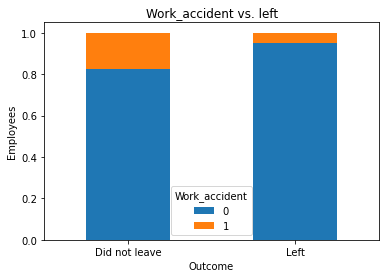

In [12]:
outcome_Work_accident.plot(kind="bar", stacked=True)
plt.title("Work_accident vs. left")
plt.xlabel("Outcome")
plt.ylabel("Employees")
plt.xticks(rotation=0, horizontalalignment="center")

Fewer accidents among those who left.

### 2.2.2. Promotion in the last 5 years <a class="anchor" id="section_2_2_2"></a>

In [13]:
# promotion_last_5years vs. left in percentages
outcome_promotion_last_5years = pd.crosstab(index = df['left'], 
                           columns = df['promotion_last_5years'], normalize='index')

outcome_promotion_last_5years.index= ['Did not leave', 'Left']
outcome_promotion_last_5years

promotion_last_5years,0,1
Did not leave,0.973749,0.026251
Left,0.994679,0.005321


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

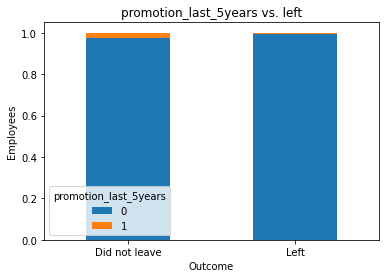

In [14]:
outcome_promotion_last_5years.plot(kind="bar", stacked=True)
plt.title("promotion_last_5years vs. left")
plt.xlabel("Outcome")
plt.ylabel("Employees")
plt.xticks(rotation=0, horizontalalignment="center")

Almost no promotion among those who left.

### 2.2.3. Department <a class="anchor" id="section_2_2_3"></a>

In [15]:
# department vs. left in percentages
outcome_department = pd.crosstab(index = df['left'], 
                           columns = df['department'], normalize='index')

outcome_department.index= ['Did not leave', 'Left']
outcome_department

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Did not leave,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
Left,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

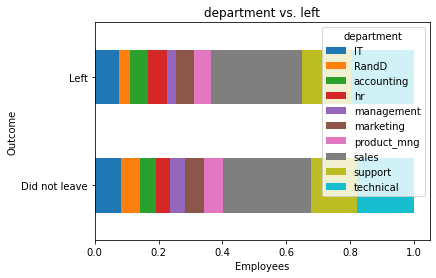

In [16]:
outcome_department.plot.barh(stacked=True)
plt.title("department vs. left")
plt.xlabel("Employees")
plt.ylabel("Outcome")
plt.xticks(rotation=0, horizontalalignment="center")

In [ ]:
# number of employees by department
df['department'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='department'
)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'

)

Most people work for sales, technical and support departments. In terms of distribution by department, fairly similar distribution among those who left and those who did not leave.

### 2.2.4. Salary <a class="anchor" id="section_2_2_4"></a>

In [ ]:
# salary counts
df['salary'].value_counts()

In [ ]:
sns.countplot(x='salary',  data=df)

In [ ]:
# salary vs. department in percentages
salary_dept = pd.crosstab(index = df['department'], 
                           columns = df['salary'], normalize='index')

salary_dept

In [ ]:
salary_dept.plot.barh(stacked=True)
plt.title("salary vs. department")
plt.xlabel("Salary")
plt.ylabel("Department")
plt.xticks(rotation=0, horizontalalignment="center")

In [17]:
# salary vs. left in percentages
outcome_salary = pd.crosstab(index = df['left'], 
                           columns = df['salary'], normalize='index')

outcome_salary.index= ['Did not leave', 'Left']
outcome_salary

salary,high,low,medium
Did not leave,0.101068,0.450123,0.448810
Left,0.022963,0.608233,0.368804


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

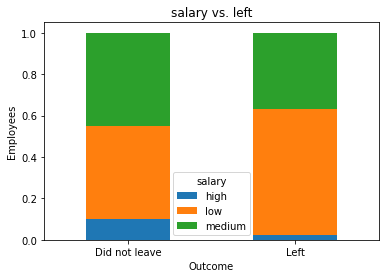

In [18]:
outcome_salary.plot(kind="bar", stacked=True)
plt.title("salary vs. left")
plt.xlabel("Outcome")
plt.ylabel("Employees")
plt.xticks(rotation=0, horizontalalignment="center")

More or less equal distribution of salaries accross departments except for managers who have a larger proportion of high salaries. Fewer people with high and medium salary leave.

### 2.2.5. Time spent in the company <a class="anchor" id="section_2_2_5"></a>

In [19]:
# time_spend_company vs. left in percentages
outcome_time_spend_company = pd.crosstab(index = df['left'], 
                           columns = df['time_spend_company'], normalize='index')

outcome_time_spend_company.index= ['Did not leave', 'Left']
outcome_time_spend_company

time_spend_company,2,3,4,5,6,7,8,10
Did not leave,0.279226,0.425009,0.14587,0.056003,0.044540,0.016451,0.014176,0.018726
Left,0.014842,0.444133,0.24923,0.233268,0.058527,0.000000,0.000000,0.000000


Text(0, 0.5, 'Outcome')

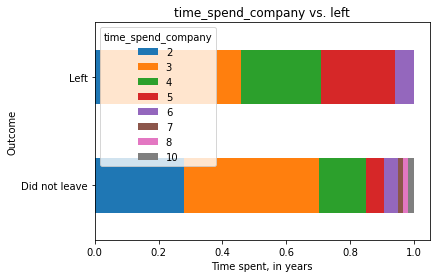

In [20]:
outcome_time_spend_company.plot.barh(stacked=True)
plt.title("time_spend_company vs. left")
plt.xlabel("Time spent, in years")
plt.ylabel("Outcome")

Those who work for 2, 7, 8 and 9 years almost always stay.

### 2.2.6. Number of projects <a class="anchor" id="section_2_2_6"></a>

In [21]:
# mean number_project vs. left
proj_left = df.groupby('left').number_project.mean()
proj_left

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

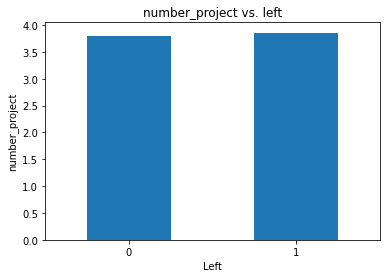

In [22]:
proj_left.plot(kind="bar", stacked=True)
plt.title("number_project vs. left")
plt.xlabel("Left")
plt.ylabel("number_project")
plt.xticks(rotation=0, horizontalalignment="center")

Mean number of projects' bar plot not very informative.

In [23]:
# number_project vs. left in percentages
outcome_number_project = pd.crosstab(index = df['left'], 
                           columns = df['number_project'], normalize='index')

outcome_number_project.index= ['Did not leave', 'Left']
outcome_number_project

number_project,2,3,4,5,6,7
Did not leave,0.071841,0.348530,0.346167,0.188047,0.045415,0.000000
Left,0.438813,0.020162,0.114534,0.171381,0.183422,0.071689


Text(0, 0.5, 'Outcome')

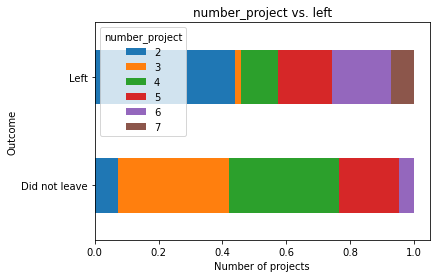

In [24]:
outcome_number_project.plot.barh(stacked=True)
plt.title("number_project vs. left")
plt.xlabel("Number of projects")
plt.ylabel("Outcome")

- Employees with 2 projects leave more often
- Those with 3 projects almost never leave
- Those with 4 projects stay more often
- Those with 7 projects leave

**Conclusion for categorical variables:** among categorical variables `promotion_last_5years`, `salary`, `time_spend_company`, `number_project` may become good predictors for the model. It is interesting to note that people who had more work related accidents tend to stay more often.

## Section 2.3. Exploring numerical variables <a class="anchor" id="section_2_3"></a>

### 2.3.1. Summary statistics for numerical variables <a class="anchor" id="section_2_3_1"></a>

In [25]:
df[['satisfaction_level', 'last_evaluation', 'average_montly_hours']].describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


Mean and median are quite close, there appers to be no significant skew in the distributions.

### 2.3.2. Satisfaction level <a class="anchor" id="section_2_3_2"></a>

[Text(0, 0.5, 'frequency')]

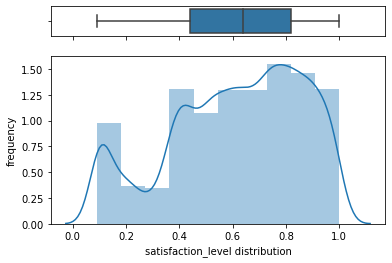

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["satisfaction_level"], ax=ax_box)
sns.distplot(df["satisfaction_level"], ax=ax_hist, bins=10)
ax_box.set(xlabel='')
ax_hist.set(xlabel='satisfaction_level distribution')
ax_hist.set(ylabel='frequency')

Quite a lot of unsatisfied employees.

[Text(0, 0.5, 'frequency')]

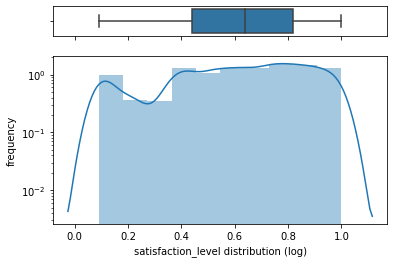

In [27]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["satisfaction_level"], ax=ax_box)
sns.distplot(df["satisfaction_level"], ax=ax_hist, bins=10).set_yscale('log')
ax_box.set(xlabel='')
ax_hist.set(xlabel='satisfaction_level distribution (log)')
ax_hist.set(ylabel='frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09B458B20>]],
      dtype=object)

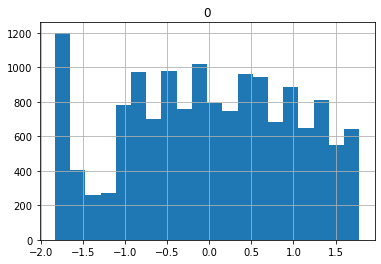

In [28]:
# trying Yeo-Johnson transform
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
sat_trans = power.fit_transform(df[["satisfaction_level"]])
sat_trans = pd.DataFrame(sat_trans)
sat_trans.hist(bins = 20)

In [29]:
# satisfaction level vs. left
sat_left = df.groupby('left').satisfaction_level.mean()
sat_left

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

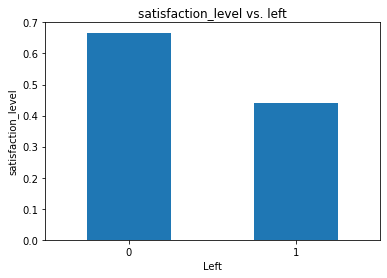

In [30]:
sat_left.plot(kind="bar", stacked=True)
plt.title("satisfaction_level vs. left")
plt.xlabel("Left")
plt.ylabel("satisfaction_level")
plt.xticks(rotation=0, horizontalalignment="center")

Those who left are significantly less satisfied.

In [31]:
# satisfaction level by department
sat_dept = df.groupby('department').satisfaction_level.mean().sort_values()
sat_dept

department
accounting     0.582151
hr             0.598809
technical      0.607897
sales          0.614447
IT             0.618142
support        0.618300
marketing      0.618601
product_mng    0.619634
RandD          0.619822
management     0.621349
Name: satisfaction_level, dtype: float64

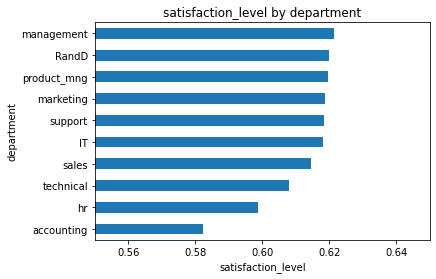

In [32]:
sat_dept.plot.barh(stacked=True)
plt.title("satisfaction_level by department")
plt.xlabel("satisfaction_level")
plt.ylabel("department")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlim(0.55, 0.65)
plt.show()

Accountants, HR and technical people are visibly less satisfied.

### 2.3.3. Last evaluation <a class="anchor" id="section_2_3_3"></a>

[Text(0, 0.5, 'frequency')]

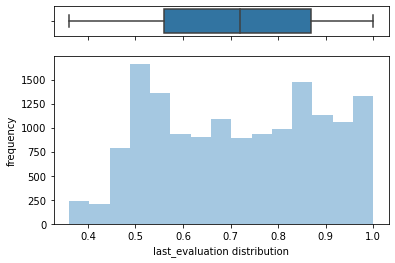

In [33]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["last_evaluation"], ax=ax_box)
sns.distplot(df["last_evaluation"], ax=ax_hist, bins=15, kde=False)
ax_box.set(xlabel='')
ax_hist.set(xlabel='last_evaluation distribution')
ax_hist.set(ylabel='frequency')

Bimodal distribution.

[Text(0, 0.5, 'frequency')]

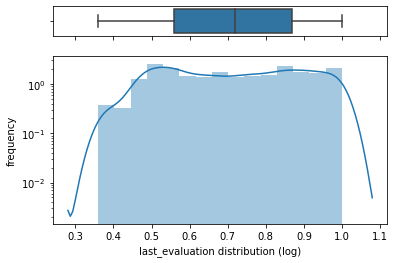

In [34]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["last_evaluation"], ax=ax_box)
sns.distplot(df["last_evaluation"], ax=ax_hist, bins=15).set_yscale('log')
ax_box.set(xlabel='')
ax_hist.set(xlabel='last_evaluation distribution (log)')
ax_hist.set(ylabel='frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09B799160>]],
      dtype=object)

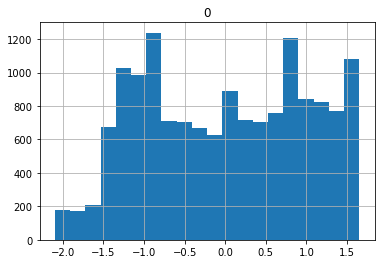

In [35]:
# trying Yeo-Johnson transform
power = PowerTransformer(method='yeo-johnson', standardize=True)
eval_trans = power.fit_transform(df[["last_evaluation"]])
eval_trans = pd.DataFrame(eval_trans)
eval_trans.hist(bins = 20)

In [36]:
# last_evaluation vs. left
eval_left = df.groupby('left').last_evaluation.mean()
eval_left

left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

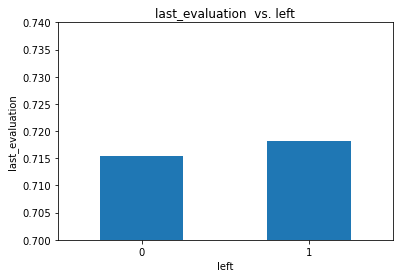

In [37]:
eval_left.plot(kind="bar", stacked=True)
plt.title("last_evaluation  vs. left")
plt.xlabel("left")
plt.ylabel("last_evaluation")
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylim(0.7, 0.74)
plt.show()

The difference is extremely small.

### 2.3.4. Average montly hours <a class="anchor" id="section_2_3_4"></a>

[Text(0, 0.5, 'frequency')]

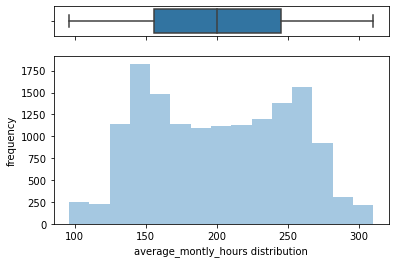

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["average_montly_hours"], ax=ax_box)
sns.distplot(df["average_montly_hours"], ax=ax_hist, bins=15, kde=False)
ax_box.set(xlabel='')
ax_hist.set(xlabel='average_montly_hours distribution')
ax_hist.set(ylabel='frequency')

Bimodal distribution.

[Text(0, 0.5, 'frequency')]

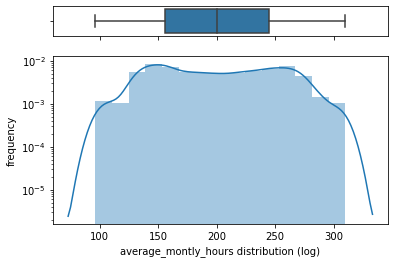

In [39]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["average_montly_hours"], ax=ax_box)
sns.distplot(df["average_montly_hours"], ax=ax_hist, bins=15).set_yscale('log')
ax_box.set(xlabel='')
ax_hist.set(xlabel='average_montly_hours distribution (log)')
ax_hist.set(ylabel='frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09BAD17F0>]],
      dtype=object)

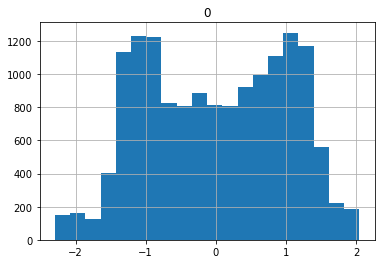

In [40]:
# trying Yeo-Johnson transform
power = PowerTransformer(method='yeo-johnson', standardize=True)
hours_trans = power.fit_transform(df[["average_montly_hours"]])
hours_trans = pd.DataFrame(hours_trans)
hours_trans.hist(bins = 20)

In [41]:
# average_montly_hours vs. left
hours_left = df.groupby('left').average_montly_hours.mean()
hours_left

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

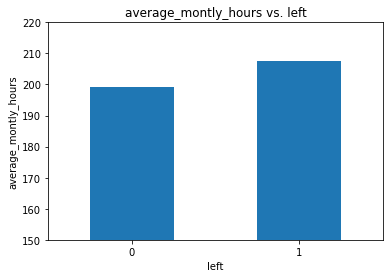

In [42]:
hours_left.plot(kind="bar", stacked=True)
plt.title("average_montly_hours vs. left")
plt.xlabel("left")
plt.ylabel("average_montly_hours")
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylim(150, 220)
plt.show()

**Conclusion for numerical variables:**. Numerical variables require log transformation for better prediction. Yeo-Johnson transformation did not show good results. `satisfaction_level` and `average_montly_hours` may propably be used in the model.

### 2.3.5. Outliers <a class="anchor" id="section_2_3_5"></a>

In [43]:
# satisfaction_level outliers
q1 = df.satisfaction_level.quantile(0.25)
q3 = df.satisfaction_level.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

outliers_sat = df[(df.satisfaction_level < lower_bound) | (df.satisfaction_level > upper_bound)]
outliers_sat.head()

-0.12999999999999995 1.39


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


There are no outliers as boundaries exceed min and max values.

In [44]:
# last_evaluation outliers
q1 = df.last_evaluation.quantile(0.25)
q3 = df.last_evaluation.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

eval = df[(df.last_evaluation < lower_bound) | (df.last_evaluation > upper_bound)]
eval.head()

0.09500000000000014 1.335


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


There are no outliers as boundaries exceed min and max values.

In [45]:
# average_montly_hours outliers
q1 = df.average_montly_hours.quantile(0.25)
q3 = df.average_montly_hours.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

hours = df[(df.average_montly_hours < lower_bound) | (df.average_montly_hours > upper_bound)]
hours.head()

22.5 378.5


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


There are no outliers as boundaries exceed min and max values.

## Section 2.4. Data investigation <a class="anchor" id="section_2_4"></a>

#### People with high 'salary' have higher 'average_montly_hours'?

In [46]:
# testing the hypothesis that people with high 'salary' have higher 'average_montly_hours'
sal_hours = df.groupby('salary').average_montly_hours.mean().sort_values()
sal_hours

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

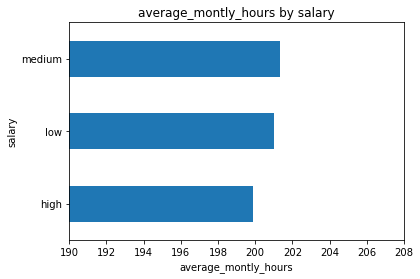

In [47]:
sal_hours.plot.barh(stacked=True)
plt.title("average_montly_hours by salary")
plt.xlabel("average_montly_hours")
plt.ylabel("salary")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlim(190, 208)
plt.show()

Actually, those who have a medium salary appear to work slightly longer hours being the difference though quite small. We can test whether there is a significant difference with ANOVA.

In [48]:
# splitting data into three samples
low = df[df['salary'] == 'low']
low = low[['average_montly_hours']]

medium = df[df['salary'] == 'medium']
medium = medium[['average_montly_hours']]

high = df[df['salary'] == 'high']
high = high[['average_montly_hours']]

In [49]:
from scipy.stats import f_oneway
f_oneway(low, medium, high)

F_onewayResult(statistic=array([0.45836244]), pvalue=array([0.63232712]))

As p-value > 0.05, ANOVA shows that there is no significant difference between `average_montly_hours` in terms of salary.

# Part 3. Modelling <a class="anchor" id="part3"></a>

## Section 3.1. Data Transformation <a class="anchor" id="section_3_1"></a>

In [50]:
# basic assumption for LDA is that numeric variables have to be normal
# log transformation of numerical variables
df['sat_level_log'] = np.log(df['satisfaction_level'])
df['last_eval_log'] = np.log(df['last_evaluation'])
df['av_hours_log'] = np.log(df['average_montly_hours'])

# changing column order
columnsTitles = ['satisfaction_level', 'sat_level_log', 'last_evaluation', 'last_eval_log', 'number_project', 'average_montly_hours', 'av_hours_log', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']
df = df.reindex(columns=columnsTitles)

In [51]:
# transforming 'salary' catogories into 'int'
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'])

In [52]:
# transforming 'deparment' catogories into 'int'
labelencoder= LabelEncoder()
df['department'] = labelencoder.fit_transform(df['department'])

In [53]:
df.head()

,satisfaction_level,sat_level_log,last_evaluation,last_eval_log,number_project,average_montly_hours,av_hours_log,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,-0.967584,0.53,-0.634878,2,157,5.056246,3,0,0,7,1,1
1,0.80,-0.223144,0.86,-0.150823,5,262,5.568345,6,0,0,7,2,1
2,0.11,-2.207275,0.88,-0.127833,7,272,5.605802,4,0,0,7,2,1
3,0.72,-0.328504,0.87,-0.139262,5,223,5.407172,5,0,0,7,1,1
4,0.37,-0.994252,0.52,-0.653926,2,159,5.068904,3,0,0,7,1,1


## Section 3.2. Correlation analysis <a class="anchor" id="section_3_2"></a>

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson (point-biserial) correlation coefficient if the categorical variable has a 0/1-coding for the categories.

In [54]:
df_c = df[
    ['satisfaction_level', 
    'sat_level_log',
    'last_evaluation',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'av_hours_log',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

# df_c.corr()

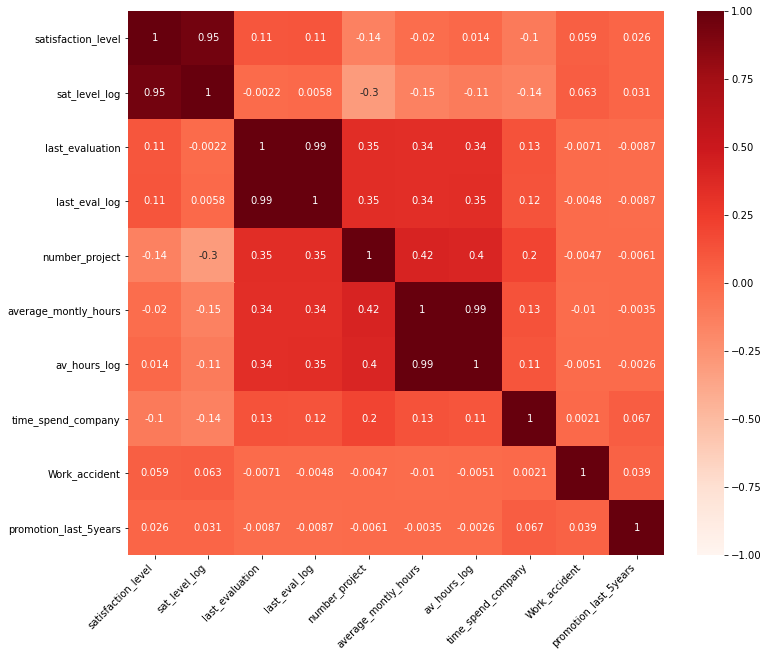

In [55]:
# Pearson Correlation matrix
plt.figure(figsize=(12,10))
cor = df_c.corr()
ax = sns.heatmap(cor, 
                 annot=True, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 cmap=plt.cm.Reds) # cmap=sns.diverging_palette(20, 220, n=200)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [56]:
# largest and smallest correlation
c = df_c.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [57]:
print(so[-22:-16])

number_project        last_eval_log           0.350842
last_eval_log         number_project          0.350842
number_project        av_hours_log            0.401839
av_hours_log          number_project          0.401839
average_montly_hours  number_project          0.417211
number_project        average_montly_hours    0.417211
dtype: float64


Top two meaningful correlations include `number_project` and `average_montly_hours`, and `number_project` and `last_eval_log`.

In [58]:
print(so[:4])

Work_accident       time_spend_company    0.002120
time_spend_company  Work_accident         0.002120
last_evaluation     sat_level_log         0.002241
sat_level_log       last_evaluation       0.002241
dtype: float64


Bottom two meaningful correlations include `sat_level_log` and `last_evaluation`, and `time_spend_company` and `Work_accident`.

## Section 3.3. Multicollinearity analysis <a class="anchor" id="section_3_3"></a>

In [59]:
import warnings
warnings.filterwarnings('ignore')

# Getting variables for which to compute VIF and adding intercept term
X = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

X['Intercept'] = 1

In [60]:
# X.head()

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

               variables        VIF
0     satisfaction_level   1.067160
1          last_eval_log   1.246795
2         number_project   1.355188
3   average_montly_hours   1.281311
4     time_spend_company   1.058839
5          Work_accident   1.005208
6  promotion_last_5years   1.007573
7              Intercept  48.504410


As VIF is closer to 1, we can say that there is moderate correlation between explanatory variables.

## Section 3.4. Model development and evaluation <a class="anchor" id="section_3_4"></a>

### 3.4.1. Linear Discriminant Analysis <a class="anchor" id="section_3_4_1"></a>

In [62]:
# trying different features
df_model = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model, df['left'], test_size = 0.30, random_state=42)

In [64]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
# making prediction
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

### 3.4.2. Logistic Regression <a class="anchor" id="section_3_4_2"></a>

In [68]:
# trying different features
df_model_2 = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    ]
  ]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_model_2, df['left'], test_size = 0.30, random_state = 42)

In [70]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [72]:
# performance measurement
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, lr.predict(X_test)))
print(accuracy_score(y_test, lr.predict(X_test)))

[[3160  268]
 [ 816  256]]
0.7591111111111111


### 3.4.3. Random Forest Classifier <a class="anchor" id="section_3_4_3"></a>

In [73]:
# trying different features
df_model_3 = df[
    ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'department',
    'salary'
    ]
  ]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_model_3, df['left'], test_size = 0.30, random_state = 42)

In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=9, random_state=42, n_jobs=-1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [77]:
# test performance measurement
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[3418   10]
 [  95  977]]
0.9766666666666667


Trying **feature selection** to reduce the variance of the model, and therefore overfitting.

In [78]:
feat_labels = ['satisfaction_level',
    'last_eval_log',
    'number_project', 
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'department',
    'salary'
    ]

In [79]:
# name and gini importance of each feature
for feature in zip(feat_labels, classifier.feature_importances_):
    print(feature)

('satisfaction_level', 0.33518238819427854)
('last_eval_log', 0.11467868669774808)
('number_project', 0.19991554815436824)
('average_montly_hours', 0.15054996293765044)
('time_spend_company', 0.1849053997672037)
('Work_accident', 0.0043681189902708825)
('promotion_last_5years', 0.0007858384076546757)
('department', 0.004841179779207061)
('salary', 0.004772877071618341)


In [80]:
# selector object that will use the random forest classifier to identify feature importance > 0.10
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(classifier, threshold=0.10)

# training the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=9, n_jobs=-1,
                                                 random_state=42),
                threshold=0.1)

In [81]:
# names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

satisfaction_level
last_eval_log
number_project
average_montly_hours
time_spend_company


In [82]:
# transforming the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [83]:
# new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [84]:
# applying the full featured classifier to the test data
y_important_pred = clf_important.predict(X_important_test)

# view the accuracy of limited feature model
accuracy_score(y_test, y_important_pred)

0.9886666666666667

# Part 4. Conclusion <a class="anchor" id="part4"></a>

In this research we decided to compare LDA, Logistic Regression and Random Forest Classifier models. As the data are highly skewed, sometimes bimodal and include categorical variables, the Random Forest Classifier model performed the best with an accuracy of 97.7%. Feature importance selection allowed to improve the accuracy up to 98.9% and at the same time reduced the complexity of the model.